# Bank Customer Churn Prediction using Artificial  Neural Networks

## Importing  necessary libraries

In [456]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
import pandas as pd
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

## Reading the input file

In [457]:
dataset = pd.read_csv("bank_customer_churn_prediction.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values



## Encoding

In [458]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1, 2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the data  into training and testing sets

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature scaling - standarization

In [460]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating the ANN model

In [469]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=16, activation='relu')) 

ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.9, patience=5, min_lr=0.00001)
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0005)


ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


## Model Learning

In [470]:
history = ann.fit(X_train, y_train ,batch_size=64,callbacks=lr_scheduler ,epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6788 - loss: 0.6538 - val_accuracy: 0.7960 - val_loss: 0.5611 - learning_rate: 5.0000e-04
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.8025 - loss: 0.5211 - val_accuracy: 0.7975 - val_loss: 0.4828 - learning_rate: 5.0000e-04
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.7916 - loss: 0.4737 - val_accuracy: 0.7975 - val_loss: 0.4510 - learning_rate: 5.0000e-04
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.7901 - loss: 0.4493 - val_accuracy: 0.7975 - val_loss: 0.4355 - learning_rate: 5.0000e-04
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.7992 - loss: 0.4262 - val_accuracy: 0.7975 - val_loss: 0.4257 - learning_rate: 5.0000e-04
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.7976 - loss: 0.4200 - val_accuracy: 0.7975 - val_loss: 0.4179 - learning_rate: 5.0000e-04
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 797u

## Evaluating model performance

In [471]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)

wrong = 0
for i in range(len(y_test)):
    if y_pred[i] != y_test[i]:
        wrong  += 1

print(1 - wrong/len(y_test))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
0.866


## Train and Validation loss/accuracy plots

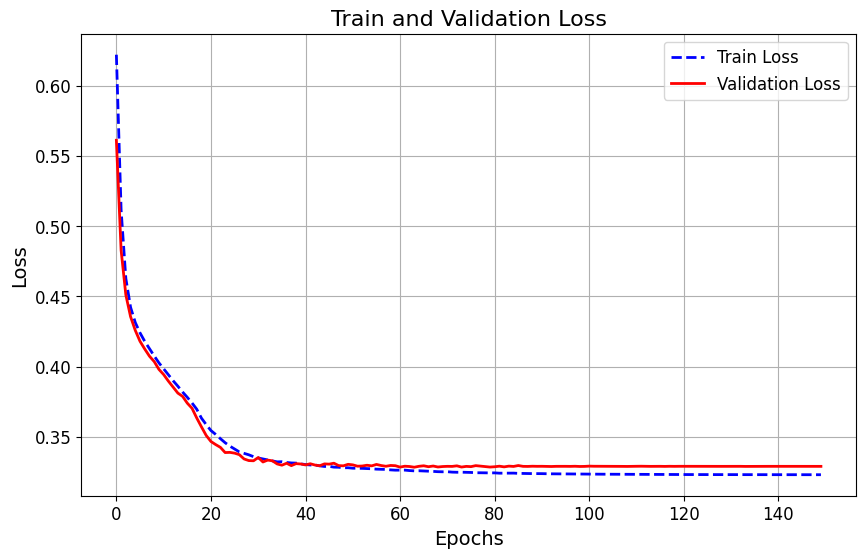

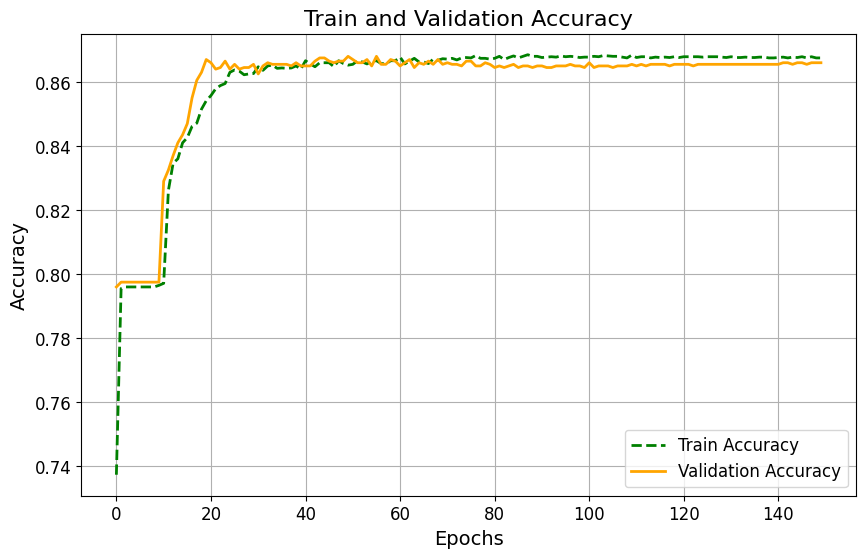

In [472]:
plt.rc('font', size=12)
plt.rc('axes', titlesize=16) 
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue', linestyle='--', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='-', linewidth=2)
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6)) 
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green', linestyle='--', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='-', linewidth=2)
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()